In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("salary_data.csv")
df = df.sample(frac=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 14 to 4
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


## Feature Scalling

In [114]:
# Min-Max Transform
df["YearsExperience"] = (df["YearsExperience"] - min(df["YearsExperience"])) / (max(df["YearsExperience"]) - min(df["YearsExperience"]))

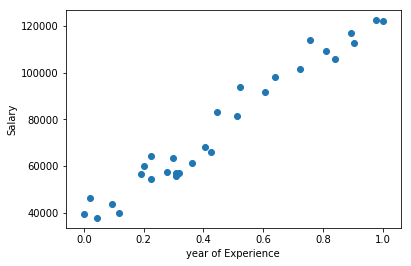

In [115]:
X=np.array(df.iloc[:,:1])
Y=np.array(df.iloc[:,1:])
plt.scatter(X,Y)
plt.xlabel("year of Experience")
plt.ylabel("Salary")
plt.show()

# Split the dataset into two part

In [116]:
#Training_sample has 50% of data and test_sample has 50% of data
split_value=round((len(X)-(len(X)*0.50)))

In [117]:
x_train=X[:split_value].copy()
y_train=Y[:split_value].copy()
x_test=X[split_value:].copy()
y_test=Y[split_value:].copy()

# Simple Linear Resgression Model from scratch

In [125]:
# for the prediction we have to find a,b
def gradient_descent(x_train,y_train):
    m=len(x_train)
    y=y_train[:].copy()
    a=b=0  #where: a:slope; b:Intercept
    iteration =3000
    learning_rate=0.09
    cost=[]
    it=[]
    for i in range(iteration):
        y_predict = a*x_train+b   # hypothesis fn = ax+b
        cost_Function=(1/(2*m))*(sum(value**2 for value in (y-y_predict)))
        temp0= (1/m)*(sum((y_predict-y)*x_train)) #derivative for a
        temp1= (1/m)*(sum(y_predict-y)) #derivative for b
        a=a-learning_rate*(temp0)  #update a with learning rate
        b=b-learning_rate*(temp1)  #update b with learning rate
        #print("a {}, b{}, cost {}, itteration {}".format(a,b,cost_Function,i))
        if(i%10==0):
            cost.append(cost_Function[0])
            it.append(i)
    cv=a,b,cost,it
    return cv

In [126]:
a=gradient_descent(x_train,y_train)
new_y= (a[0][0]* x_test) + a[1][0]
#new_y

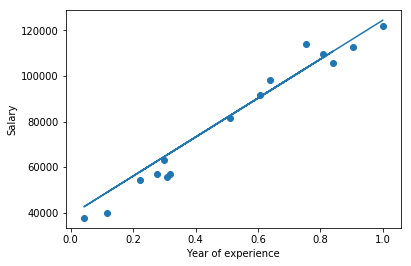

array([1.45187585e+09])

In [127]:
plt.scatter(x_test,y_test)
plt.plot(x_test,new_y)
plt.xlabel("Year of experience")
plt.ylabel("Salary")
plt.show()
mse1=(sum(new_y-y_test)**2)
mse1

# Plot cost vs iteration

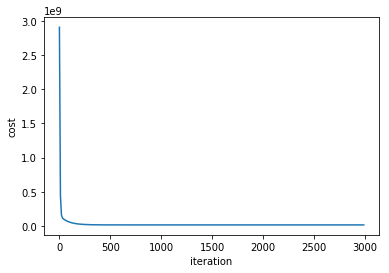

In [128]:
plt.plot(a[3],a[2])
#plt.plot(x_test,new_y)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

# Comparision with Scikit-learn

In [129]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_p=lreg.predict(x_test)
mse2=(sum(y_p-y_test)**2)
mse2

array([1.45187589e+09])

# which one is best

In [130]:

if(mse1[0]<mse2[0]):
    print("Scratch is best")
else:
    print("Sklearn is best")

Scratch is best
